In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

from typing import NamedTuple
from functools import partial
import math
import json

import drawsvg


In [44]:
import xylo
import xylo.types as t
import xylo.tuning

In [106]:
tuning = xylo.tuning.glock_F5_200
bars = list(tuning.lengths.keys())
bar_width = 32
node_ratio = 0.224

max_length = tuning.lengths[bars[0]]

bar_spacing = 7
# bar_spacing = 8
angle1 = math.radians(2.275)
# angle1 = math.radians(2.624)
angle2 = math.radians(7.836)
# angle2 = math.radians(9.23)

node_ratio_nat_rear = 0.21
node_ratio_nat_front = 0.27
angle1 = math.radians(2.133)
angle2 = math.radians(7.377)

node_ratio_nat_rear = 0.208
node_ratio_nat_front = 0.28
angle1 = math.radians(2.113)
angle2 = math.radians(7.277)

In [107]:
lengths = xylo.tuning.glock_F5_200.lengths
lengthsmm = { k : v * 1000 for k, v in lengths.items() }
x_index = { k: xylo.tuning.note_to_x(k, 58) for k, v in lengthsmm.items() }
# x at left side of bar
x = { k: bar_spacing + (bar_width + bar_spacing) * v for k, v in x_index.items() }

In [108]:
naturals = { k for k, v in lengthsmm.items() if xylo.tuning.check_natural(k) }
accidentals = { k for k, v in lengthsmm.items() if not xylo.tuning.check_natural(k) }

In [122]:
x = { k: (bar_width + bar_spacing) * v for k, v in x_index.items() }

y1s = { k: (max_length * 1000 * node_ratio_nat_rear) - ((x[k] + (bar_width / 2)) * math.tan(angle1)) for k in lengths }
y2s = { k: (max_length * 1000 * (1 - node_ratio_nat_front)) - ((x[k] + (bar_width / 2)) * math.tan(angle2)) for k in lengths }
y224s = { k: lengthsmm[k] * (1 - 0.224) for k in lengths }

y0s = []
avg1 = []
avg2 = []
for k in bars:
  len = lengths[k] * 1000
  y1 = y1s[k]
  y2 = y2s[k]

  yy2 = len * (1 - 0.224)
  yy1 = yy2 - (y2 - y1)
  yy0 = yy2 - y2

  r1 = yy1 / len
  r2 = 0.224 # (len - y2) / len
  avg1 += [r1]
  avg2 += [r2]
  y0s += [yy0]
  print(f"note {k}, x {x[k]}\n  ratio1 {r1}, ratio2 {r2}, y0 {yy0}")
  # print(f"note {k}, x {x[k]}, x_index {x_index[k]}\n   len {len}, ratio1 {y1 / len}, y2 {y2}, ratio2 {(len - y2) / len}")

print(sum(avg1) / 32)
print(sum(avg2) / 32)

note 57, x -19.5
  ratio1 0.26247932174624483, ratio2 0.224, y0 11.256192632509283
note 58, x 0.0
  ratio1 0.25588285761151935, ratio2 0.224, y0 9.047806894243422
note 59, x 19.5
  ratio1 0.24940307616279, ratio2 0.224, y0 6.990983655977516
note 60, x 39.0
  ratio1 0.24307052922259365, ratio2 0.224, y0 5.085722917711649
note 61, x 58.5
  ratio1 0.23691862755044993, ratio2 0.224, y0 3.332024679445766
note 62, x 78.0
  ratio1 0.23098372780315152, ratio2 0.224, y0 1.7298889411799507
note 63, x 97.5
  ratio1 0.225305186882983, ratio2 0.224, y0 0.2793157029140616
note 64, x 136.5
  ratio1 0.2296726146478523, ratio2 0.224, y0 1.3187942263823516
note 65, x 156.0
  ratio1 0.2242566124734217, ratio2 0.224, y0 0.01978348811647379
note 66, x 175.5
  ratio1 0.21918813369823797, ratio2 0.224, y0 -1.1276647501494352
note 67, x 195.0
  ratio1 0.21381554619654344, ratio2 0.224, y0 -2.2751129884152874
note 68, x 214.5
  ratio1 0.2088415080400534, ratio2 0.224, y0 -3.2709987266811282
note 69, x 253.5
  

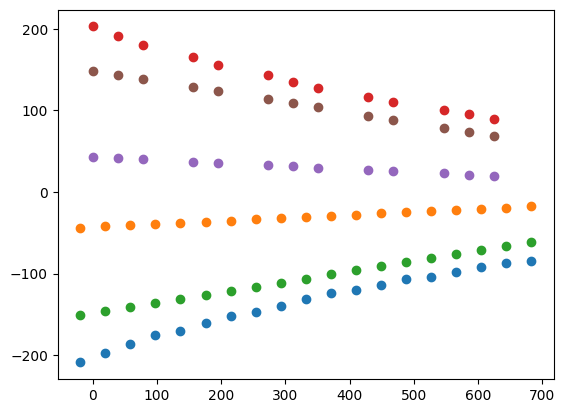

In [123]:
plt.scatter([x[k] for k in naturals], [-lengthsmm[k] for k in naturals])
plt.scatter([x[k] for k in naturals], [-y1s[k] for k in naturals])
plt.scatter([x[k] for k in naturals], [-y2s[k] for k in naturals])
plt.scatter([x[k] for k in accidentals], [lengthsmm[k] for k in accidentals])
plt.scatter([x[k] for k in accidentals], [y1s[k] for k in accidentals])
plt.scatter([x[k] for k in accidentals], [y2s[k] for k in accidentals])

In [124]:
y1s

{57: 43.59788437305362,
 58: 42.878421437469214,
 59: 42.15895850188481,
 60: 41.439495566300415,
 61: 40.72003263071601,
 62: 40.00056969513161,
 63: 39.28110675954721,
 64: 37.84218088837841,
 65: 37.122717952794005,
 66: 36.4032550172096,
 67: 35.6837920816252,
 68: 34.9643291460408,
 69: 33.52540327487199,
 70: 32.80594033928759,
 71: 32.08647740370319,
 72: 31.36701446811879,
 73: 30.647551532534386,
 74: 29.928088596949983,
 75: 29.208625661365584,
 76: 27.769699790196782,
 77: 27.05023685461238,
 78: 26.330773919027976,
 79: 25.611310983443577,
 80: 24.891848047859174,
 81: 23.45292217669037,
 82: 22.73345924110597,
 83: 22.013996305521566,
 84: 21.294533369937167,
 85: 20.575070434352764,
 86: 19.85560749876836,
 87: 19.13614456318396,
 88: 17.697218692015156}

In [125]:
{ k: lengthsmm[k] - y2s[k] for k in lengthsmm }

{57: 58.06869263250928,
 58: 54.50405689424343,
 59: 51.1347336559775,
 60: 47.96072291771165,
 61: 44.98202467944577,
 62: 42.19863894117995,
 63: 39.610565702914045,
 64: 39.512544226382346,
 65: 37.11978348811647,
 66: 34.92233524985055,
 67: 32.72488701158471,
 68: 30.722751273318877,
 69: 31.405979796787108,
 70: 29.599156558521344,
 71: 28.182958320255466,
 72: 26.571447581989517,
 73: 25.155249343723682,
 74: 23.93436360545786,
 75: 22.713477867191955,
 76: 23.982643890660256,
 77: 23.347695652394364,
 78: 22.3221224141285,
 79: 21.687174175862623,
 80: 20.856913437596774,
 81: 22.907329461065032,
 82: 22.27238122279917,
 83: 21.832745484533277,
 84: 21.393109746267427,
 85: 21.148786508001535,
 86: 20.904463269735686,
 87: 21.05076503146981,
 88: 23.29649355493808}

In [126]:
y2s

{57: 150.91568236749077,
 58: 148.42563060575662,
 59: 145.9355788440225,
 60: 143.44552708228838,
 61: 140.95547532055423,
 62: 138.4654235588201,
 63: 135.97537179708596,
 64: 130.99526827361768,
 65: 128.50521651188356,
 66: 126.01516475014942,
 67: 123.52511298841529,
 68: 121.03506122668115,
 69: 116.05495770321289,
 70: 113.56490594147874,
 71: 111.07485417974462,
 72: 108.58480241801048,
 73: 106.09475065627635,
 74: 103.60469889454221,
 75: 101.11464713280807,
 76: 96.1345436093398,
 77: 93.64449184760568,
 78: 91.15444008587154,
 79: 88.6643883241374,
 80: 86.17433656240327,
 81: 81.194233038935,
 82: 78.70418127720086,
 83: 76.21412951546674,
 84: 73.7240777537326,
 85: 71.23402599199846,
 86: 68.74397423026433,
 87: 66.25392246853019,
 88: 61.27381894506192}

In [127]:
def mkdots(keys, cuts, filename, offsetx = 1.3, rot = 0):
  d = drawsvg.Drawing('297mm', '210mm')
  d.append(drawsvg.Rectangle(0, 0, '297mm', '210mm', stroke='green', stroke_width=2, fill='none'))
  d.append(drawsvg.Text(filename, '5mm', '20mm', '8mm'))
  grp = drawsvg.Group(transform = f'rotate({rot})')
  y = 10
  for k in keys:
    cut = cuts[k] + offsetx
    grp.append(drawsvg.Text(f'{k}', '2mm', f'{cut-1}mm', f'{y + 3}mm'))
    grp.append(drawsvg.Circle(f'{cut}mm', f'{y + 1}mm', '0.5mm'))
    grp.append(drawsvg.Rectangle(f'{offsetx}mm', f'{y}mm', f'{cut}mm', f'0.5mm', stroke='red', stroke_width=1))
  grp.append(drawsvg.Circle(f'{offsetx}mm', f'{y+1}mm', '1mm'))

  d.append(grp)

  d.save_html(f'data/layout/{filename}.html')
  return d

# mkdots(naturals, y1s, 'glock-natural-rear')
# mkdots(naturals, y2s, 'glock-natural-front', rot = 30, offsetx=10)
# mkdots(accidentals, y1s, 'glock-accidental-front')
# mkdots(accidentals, y2s, 'glock-accidental-rear', rot = 30, offsetx=10)

mkdots(bars, y224s, 'glock-mount-224')